<a href="https://colab.research.google.com/github/Mrkoi2002/AI/blob/main/GfrFIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install scikit-fuzzy


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 12.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=43f0806a95771ab3f1afe67aaf968066c8a02404c29b7f6f12d83c77442ba850
  Stored in directory: /root/.cache/pip/wheels/2c/04/80/7eefb1a2de7d36aefd06432fab2a1486caf0a0596a7067391a
Successfully built scikit-fuzzy


In [2]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import  control as ctrl

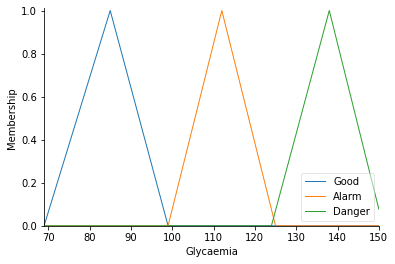

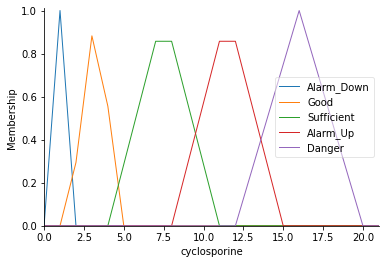

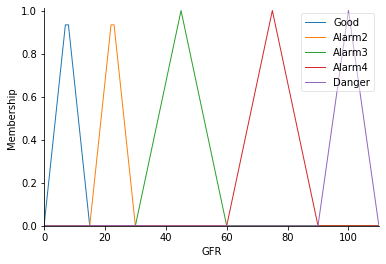

In [10]:
Glycaemia = ctrl.Antecedent(np.arange(69, 151, 1), 'Glycaemia')
cyclosporine = ctrl.Antecedent(np.arange(0, 22, 1), 'cyclosporine')
GFR = ctrl.Consequent(np.arange(0, 111, 1), 'GFR')

Glycaemia['Good'] = fuzz.trimf(Glycaemia.universe, [69, 85, 99])
Glycaemia['Alarm'] = fuzz.trimf(Glycaemia.universe, [99, 112, 125])
Glycaemia['Danger'] = fuzz.trimf(Glycaemia.universe, [124, 138, 151])

cyclosporine['Alarm_Down'] = fuzz.trimf(cyclosporine.universe, [0, 1, 2])
cyclosporine['Good'] = fuzz.trimf(cyclosporine.universe, [1.5, 3.2, 5])
cyclosporine['Sufficient'] = fuzz.trimf(cyclosporine.universe, [4, 7.5, 11])
cyclosporine['Alarm_Up'] = fuzz.trimf(cyclosporine.universe, [8, 11.5, 15])
cyclosporine['Danger'] = fuzz.trimf(cyclosporine.universe, [12, 16, 20])

GFR['Good'] = fuzz.trimf(GFR.universe, [0, 7.5, 15])
GFR['Alarm2'] = fuzz.trimf(GFR.universe, [15, 22.5, 30])
GFR['Alarm3'] = fuzz.trimf(GFR.universe, [30, 45, 60])
GFR['Alarm4'] = fuzz.trimf(GFR.universe, [60, 75, 90])
GFR['Danger'] = fuzz.trimf(GFR.universe, [90, 100, 110])

Glycaemia.view()
cyclosporine.view()
GFR.view()

In [12]:
rule1 = ctrl.Rule(Glycaemia['Danger'] & cyclosporine['Danger'], GFR['Danger'])
rule2 = ctrl.Rule(Glycaemia['Good'] & cyclosporine['Danger'], GFR['Alarm3'])
rule3 = ctrl.Rule(Glycaemia['Alarm'] & cyclosporine['Alarm_Up'], GFR['Alarm4'])
rule4 = ctrl.Rule(Glycaemia['Good'] & cyclosporine['Sufficient'], GFR['Alarm2'])
rule5 = ctrl.Rule(Glycaemia['Good'] & cyclosporine['Good'], GFR['Good'])
rule6 = ctrl.Rule(Glycaemia['Alarm'] & cyclosporine['Good'], GFR['Alarm2'])
rule7 = ctrl.Rule(Glycaemia['Danger'] & cyclosporine['Good'], GFR['Alarm3'])
rule8 = ctrl.Rule(Glycaemia['Alarm'] & cyclosporine['Danger'], GFR['Alarm4'])

75.00000000000003


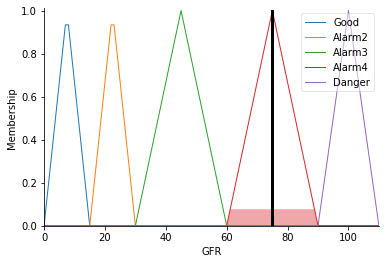

In [14]:
gfr_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8])
gfr = ctrl.ControlSystemSimulation(gfr_ctrl)
gfr.input['Glycaemia'] = 100
gfr.input['cyclosporine'] =10
gfr.compute()
print(gfr.output['GFR'])
GFR.view(sim=gfr)